In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
from urllib.request import urlopen
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dt = pd.read_csv('breast-cancer-wisconsin.data', header = None)
dt.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
dt.tail()

,0,1,2,3,4,5,6,7,8,9,10
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


# Exploratory Data Analisis

In [6]:
dt.shape

(699, 11)

In [7]:
col_names = ['Id','Clump_Thickness', 'UCSz', 'UCSp','Marginal_Adhesion','SECSz','BN','BC','NN','Mitoses','Class']
dt.columns = col_names
dt.columns

Index(['Id', 'Clump_Thickness', 'UCSz', 'UCSp', 'Marginal_Adhesion', 'SECSz',
       'BN', 'BC', 'NN', 'Mitoses', 'Class'],
      dtype='object')

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 699 non-null    int64 
 1   Clump_Thickness    699 non-null    int64 
 2   UCSz               699 non-null    int64 
 3   UCSp               699 non-null    int64 
 4   Marginal_Adhesion  699 non-null    int64 
 5   SECSz              699 non-null    int64 
 6   BN                 699 non-null    object
 7   BC                 699 non-null    int64 
 8   NN                 699 non-null    int64 
 9   Mitoses            699 non-null    int64 
 10  Class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [9]:
dt.head()

,Id,Clump_Thickness,UCSz,UCSp,Marginal_Adhesion,SECSz,BN,BC,NN,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
dt.drop('Id',axis = 1, inplace = True) #Menghapus data Id untuk melakukan redudant 
#pada kolom yang tidak dipakai untuk memprediksi

In [11]:
dt

,Clump_Thickness,UCSz,UCSp,Marginal_Adhesion,SECSz,BN,BC,NN,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clump_Thickness    699 non-null    int64 
 1   UCSz               699 non-null    int64 
 2   UCSp               699 non-null    int64 
 3   Marginal_Adhesion  699 non-null    int64 
 4   SECSz              699 non-null    int64 
 5   BN                 699 non-null    object
 6   BC                 699 non-null    int64 
 7   NN                 699 non-null    int64 
 8   Mitoses            699 non-null    int64 
 9   Class              699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [13]:
for val in dt.columns:
    print(val)
    a = dt[val].value_counts()
    print(a,"\n")

Clump_Thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_Thickness, dtype: int64 

UCSz
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: UCSz, dtype: int64 

UCSp
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: UCSp, dtype: int64 

Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64 

SECSz
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: SECSz, dtype: int64 

BN
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BN, dtype: int64 

BC
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: BC, dtype: int64 

NN
1     443
10     61
3

In [14]:
#Change BN dtype from object to int with numpy
dt['BN'] = pd.to_numeric(dt['BN'], errors = 'coerce') #erros digunakan untuk memaksa nilai kategorikal tetap dirubah menjadi numerik
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clump_Thickness    699 non-null    int64  
 1   UCSz               699 non-null    int64  
 2   UCSp               699 non-null    int64  
 3   Marginal_Adhesion  699 non-null    int64  
 4   SECSz              699 non-null    int64  
 5   BN                 683 non-null    float64
 6   BC                 699 non-null    int64  
 7   NN                 699 non-null    int64  
 8   Mitoses            699 non-null    int64  
 9   Class              699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [15]:
dt.isnull().sum()

Clump_Thickness       0
UCSz                  0
UCSp                  0
Marginal_Adhesion     0
SECSz                 0
BN                   16
BC                    0
NN                    0
Mitoses               0
Class                 0
dtype: int64

In [16]:
dt.BN.value_counts()

1.0     402
10.0    132
5.0      30
2.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: BN, dtype: int64

In [17]:
dt.BN.unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [18]:
dt.isna().sum()

Clump_Thickness       0
UCSz                  0
UCSp                  0
Marginal_Adhesion     0
SECSz                 0
BN                   16
BC                    0
NN                    0
Mitoses               0
Class                 0
dtype: int64

1. Ternyata nilai NaN dan Missing Values bernilai sama yaitu 16
2. Target label terikat yaitu : Class (yang terdiri dari nilai 2 (kanker jinak) dan 4 (kanker ganas) dengan frekuensi masing-masing 458 dan 241)
3. Shape dataset : 699 x 11
4. Menghapus label yang tidak membantu untuk melakukan prediksi : ID

In [19]:
dt.Class.value_counts()/len(dt)

2    0.655222
4    0.344778
Name: Class, dtype: float64

In [20]:
round(dt.describe(),2)

,Clump_Thickness,UCSz,UCSp,Marginal_Adhesion,SECSz,BN,BC,NN,Mitoses,Class
count,699.00,699.00,699.00,699.00,699.00,683.00,699.00,699.00,699.00,699.00
mean,4.42,3.13,3.21,2.81,3.22,3.54,3.44,2.87,1.59,2.69
std,2.82,3.05,2.97,2.86,2.21,3.64,2.44,3.05,1.72,0.95
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00
25%,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
50%,4.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,1.00,2.00
75%,6.00,5.00,5.00,4.00,4.00,6.00,5.00,4.00,1.00,4.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00


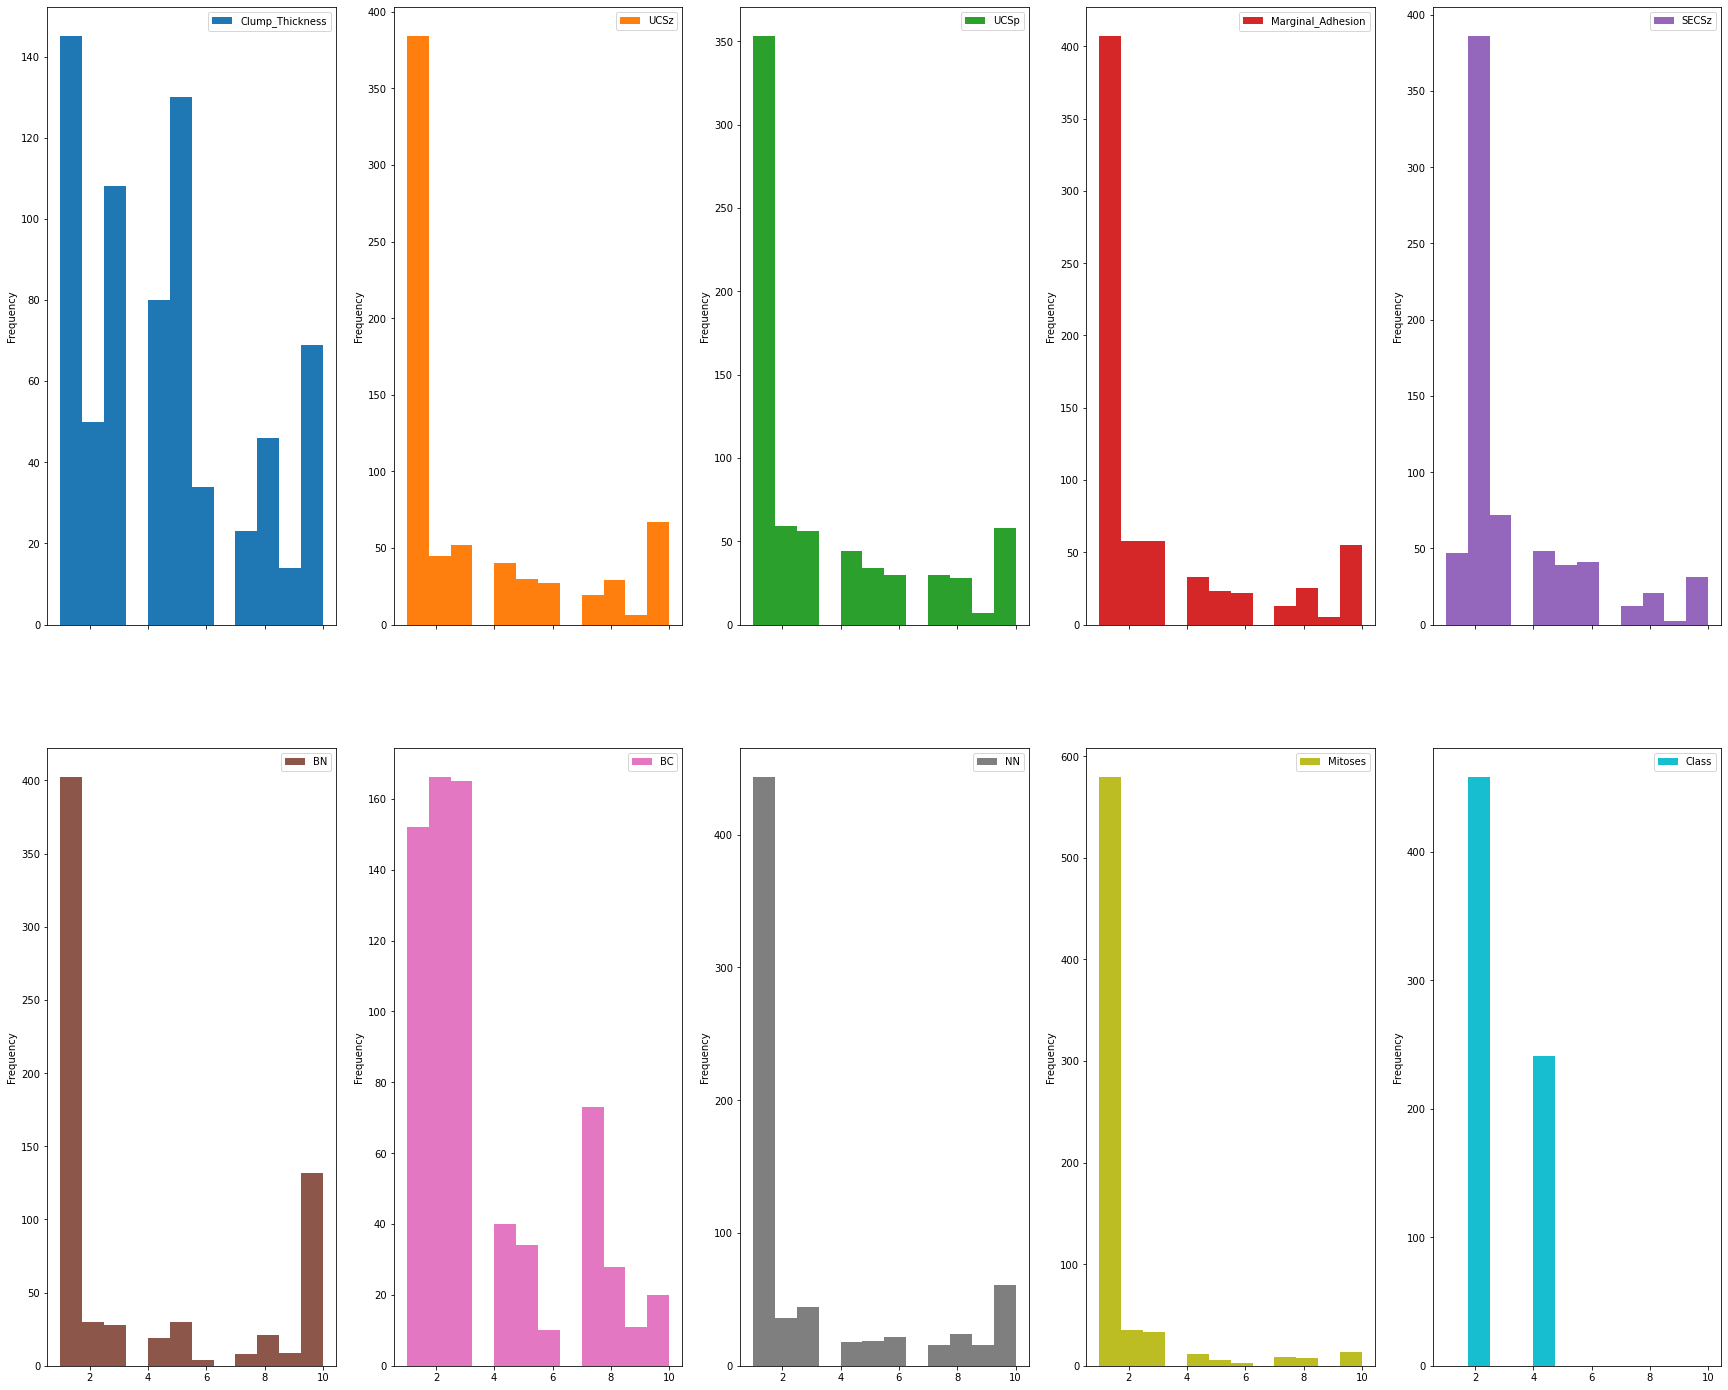

In [21]:
dt.plot(kind = 'hist', bins = 12, subplots = 'True', figsize = (30,25), layout = (2,5))
plt.show()

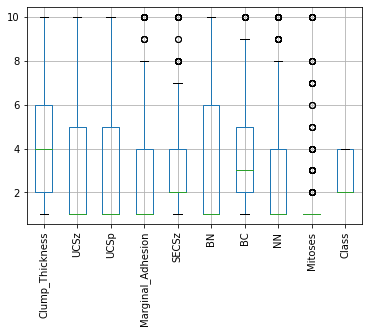

In [22]:
box_plot_chart = dt.boxplot()
box_plot_chart.set_xticklabels(box_plot_chart.get_xticklabels(), rotation = 90)
plt.show()

In [23]:
correlation_dt = dt.corr()
correlation_dt

,Clump_Thickness,UCSz,UCSp,Marginal_Adhesion,SECSz,BN,BC,NN,Mitoses,Class
Clump_Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
UCSz,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
UCSp,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
SECSz,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
BN,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
BC,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
NN,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.822696,0.756616,0.712244,0.423170,1.000000


In [24]:
correlation_dt.Class.sort_values(ascending = False)

Class                1.000000
BN                   0.822696
UCSp                 0.818934
UCSz                 0.817904
BC                   0.756616
Clump_Thickness      0.716001
NN                   0.712244
Marginal_Adhesion    0.696800
SECSz                0.682785
Mitoses              0.423170
Name: Class, dtype: float64

1. Class dipakai sebagai acuan karena bersifat variable terikat sehingga, dijadikan acuan untuk menghitung korelasi setiap kolom terhadap kolom Class.
2. Korelasi yang bersifat +1 (Mendekati +1, maka hubungannya bersifat sangat kuat positif (searah)) dan -1 (Mendekati -1, maka hubungannya bersifat sangat kuat negatif (berbanding terbalik)). Apabila mendekati 0, maka tidak ada hubungan sama sekali antar variable terikat dengan variable bebas.

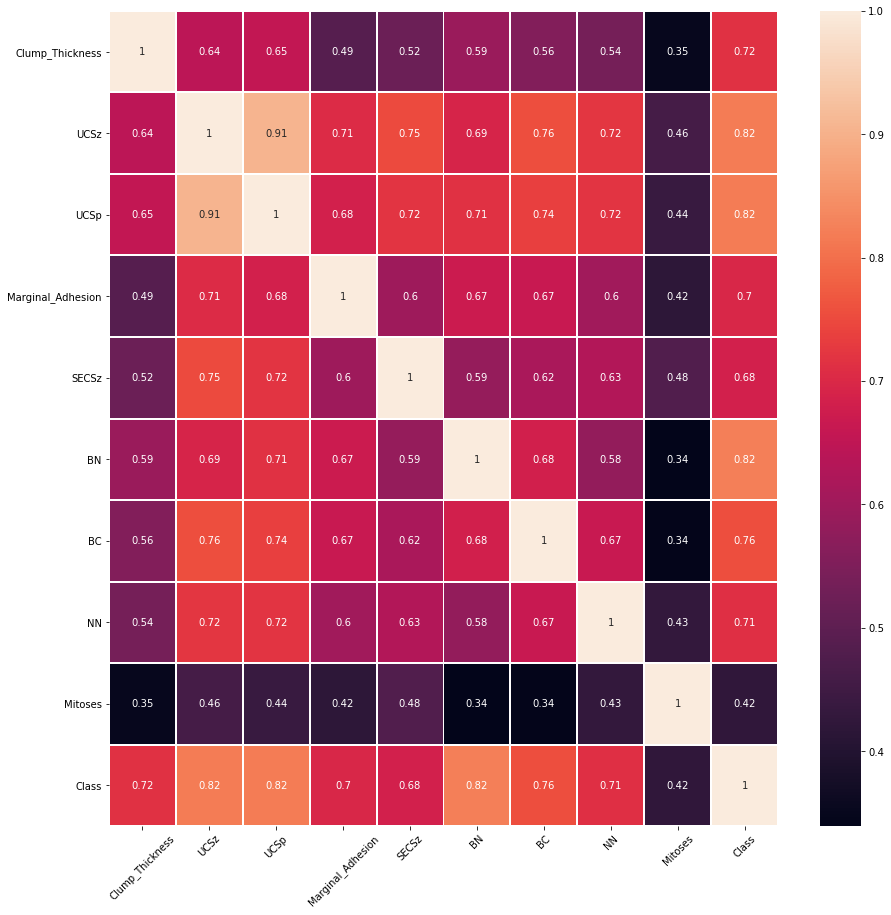

In [25]:
plt.figure(figsize = (15,15))
cor_hmp = sns.heatmap(correlation_dt, linewidth = 1, annot = True)
cor_hmp.set_xticklabels(cor_hmp.get_xticklabels(), rotation = 45)
plt.show()

Dari heatmap diatas, maka didapat bahwa variable terikat (Çlass) memiliki relasi yang kuat dengan :
a. Class dengan UCSz, UCSp, BN sekitaran 82%
b. Class dengan BC (76%), Class dengan Clump_Thickness (72%), Class dengan NN (71%), dan Class dengan Maginal_Adhesion(70%)

Korelasi positif terlemah adalah Class dengan Mitoses (42%)

# Start Implementation KNN Algorithm

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = dt.drop('Class', axis = 1)
Y = dt['Class']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [29]:
X_train.shape, X_test.shape

((559, 9), (140, 9))

In [30]:
Y_train.shape, Y_test.shape

((559,), (140,))

In [31]:
print(X_train.info(), "\n"), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 293 to 684
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clump_Thickness    559 non-null    int64  
 1   UCSz               559 non-null    int64  
 2   UCSp               559 non-null    int64  
 3   Marginal_Adhesion  559 non-null    int64  
 4   SECSz              559 non-null    int64  
 5   BN                 546 non-null    float64
 6   BC                 559 non-null    int64  
 7   NN                 559 non-null    int64  
 8   Mitoses            559 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 43.7 KB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 476 to 45
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clump_Thickness    140 non-null    int64  
 1   UCSz               140 non-null    int64  
 2   UCSp  

(None, None)

In [32]:
print(X_train.isnull().sum(), "\n"), X_test.isnull().sum()

Clump_Thickness       0
UCSz                  0
UCSp                  0
Marginal_Adhesion     0
SECSz                 0
BN                   13
BC                    0
NN                    0
Mitoses               0
dtype: int64 



(None,
 Clump_Thickness      0
 UCSz                 0
 UCSp                 0
 Marginal_Adhesion    0
 SECSz                0
 BN                   3
 BC                   0
 NN                   0
 Mitoses              0
 dtype: int64)

In [33]:
for col in X_train.columns:
    if X_train[col].isnull().mean() > 0:
        print(col, round(X_train[col].isnull().mean(), 4))

BN 0.0233


1. Sebelumnya terdapat 16 Missing Values pada label "BN" yang jika dipresentasikan ternyata 2,3% pada X_train (Presentasi dilakukan saat didalam X_train/X_test).
2. Hal yang digunakan terdapat beberapa cara antara lain, Means dan Median dan Random Sample. Jika terdapat data outlier di data anda, maka disaran menggunakan cara median. Cara ini biasa dinamakan Feature Engineering/Statiska Imputation yang tujuannya untuk membuat model algoritma yang dibuat dapat memahami data dengan baik sehingga bisa menghasilkan prediksi yang lebih baik.

In [34]:
for dt_missing_values in [X_train, X_test]:
    for col in X_train.columns:
        col_median_each_of_columns = X_train[col].median()
        dt_missing_values[col].fillna(col_median_each_of_columns, inplace = True)

In [35]:
print(X_train.isnull().sum(), "\n"), X_test.isnull().sum()

Clump_Thickness      0
UCSz                 0
UCSp                 0
Marginal_Adhesion    0
SECSz                0
BN                   0
BC                   0
NN                   0
Mitoses              0
dtype: int64 



(None,
 Clump_Thickness      0
 UCSz                 0
 UCSp                 0
 Marginal_Adhesion    0
 SECSz                0
 BN                   0
 BC                   0
 NN                   0
 Mitoses              0
 dtype: int64)

In [36]:
for col in X_train.columns:
    if X_train[col].isnull().sum() > 0:
        print(col, X_train[col].isnull().sum())

Code diatas tidak mengeluarkan output karena missing values sudah diatasi menggunakan cara median

In [37]:
X_train

,Clump_Thickness,UCSz,UCSp,Marginal_Adhesion,SECSz,BN,BC,NN,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1
...,...,...,...,...,...,...,...,...,...
359,10,3,5,4,3,7.0,3,5,3
192,5,1,1,1,2,1.0,2,1,1
629,4,1,1,1,2,1.0,1,1,1
559,5,1,1,1,2,1.0,2,1,1


In [38]:
X_train.describe()

,Clump_Thickness,UCSz,UCSp,Marginal_Adhesion,SECSz,BN,BC,NN,Mitoses
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,4.348837,3.082290,3.137746,2.787120,3.196780,3.372093,3.382826,2.872987,1.534884
std,2.788538,3.066823,2.980340,2.873581,2.191689,3.569737,2.395514,3.082493,1.651040
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
cols = X_train.columns

In [41]:
scalling = StandardScaler()

In [42]:
X_train = scalling.fit_transform(X_train)

In [43]:
X_test = scalling.fit_transform(X_test)

In [44]:
X_train = pd.DataFrame(X_train, columns = cols)
X_train

,Clump_Thickness,UCSz,UCSp,Marginal_Adhesion,SECSz,BN,BC,NN,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258
...,...,...,...,...,...,...,...,...,...
554,2.028383,-0.026856,0.625406,0.422458,-0.089865,1.017206,-0.159953,0.690648,0.888185
555,0.233723,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.577774,-0.608165,-0.324258
556,-0.125209,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.995595,-0.608165,-0.324258
557,0.233723,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.577774,-0.608165,-0.324258


### Algorithm Start it 

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn_algorithm = KNeighborsClassifier(n_neighbors = 3)

In [47]:
knn_algorithm.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
Y_predict = knn_algorithm.predict(X_test)
Y_predict

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

In [49]:
knn_algorithm.predict_proba(X_test)[:,0] #Kategori 2

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.33333333, 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.33333333, 0.        , 1.        , 1.        , 1.        ,
       0.33333333, 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.33333333,
       0.33333333, 0.        , 1.        , 1.        , 0.33333333,
       1.        , 1.        , 0.        , 0.        , 1.     

In [50]:
knn_algorithm.predict_proba(X_test)[:,1] #kategori 4

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 0.66666667, 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.66666667, 1.        , 0.        , 0.        , 0.        ,
       0.66666667, 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.66666667,
       0.66666667, 1.        , 0.        , 0.        , 0.66666667,
       0.        , 0.        , 1.        , 1.        , 0.     

predict_proba adalah fungsi yang digunakan untuk mendapat hasil predict dalam bentuk array

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
print("Accuracy Score from predict is : '{aass:0.4f}'".format(aass = accuracy_score(Y_test, Y_predict)))

Accuracy Score from predict is : '0.9643'


Hasil akurasi diatas berasal dari dataset X_test. Selanjutnya akan dicari hasil akurasi dari X_train

In [53]:
Y_predict_train = knn_algorithm.predict(X_train)
Y_predict_train

array([4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2,
       2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4,
       2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2,
       2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2,
       4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2,

In [54]:
knn_algorithm.predict_proba(X_train)[:,0] #Hasil predict dari kategori 2

array([0.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.33333333, 1.        , 1.        ,
       1.        , 0.33333333, 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.33333333, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.66666667, 0.        , 1.        , 1.        ,
       0.        , 0.33333333, 1.        , 0.33333333, 0.33333333,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 0.        , 1.        ,
       1.        , 0.66666667, 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.     

In [55]:
knn_algorithm.predict_proba(X_train)[:,1] #Hasil predict dari kategori 4

array([1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.66666667, 0.        , 0.        ,
       0.        , 0.66666667, 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.66666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 0.33333333, 1.        , 0.        , 0.        ,
       1.        , 0.66666667, 0.        , 0.66666667, 0.66666667,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.33333333, 0.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 1.     

In [56]:
print("Accuracy Score of Train Predict is '{tp:0.4f}'".format(tp = accuracy_score(Y_predict_train, Y_train)))

Accuracy Score of Train Predict is '0.9821'


In [57]:
print("Accuracy Score Test Predict is '{tp:0.4f}'".format(tp = accuracy_score(Y_predict, Y_test)))
print("Accuracy Score Train Predict is '{tp:0.4f}'".format(tp = accuracy_score(Y_predict_train, Y_train)))

Accuracy Score Test Predict is '0.9643'
Accuracy Score Train Predict is '0.9821'


In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
cm = confusion_matrix(Y_test, Y_predict)

In [110]:
cm_metrix_dataframe = pd.DataFrame(cm, columns = ['Actual Positive : 1', 'Actual Negative : 0'], 
                                   index = ['Predict Positive : 1', 'Predict Negative : 0'])
cm_metrix_dataframe

,Actual Positive : 1,Actual Negative : 0
Predict Positive : 1,83,2
Predict Negative : 0,3,52


<AxesSubplot:>

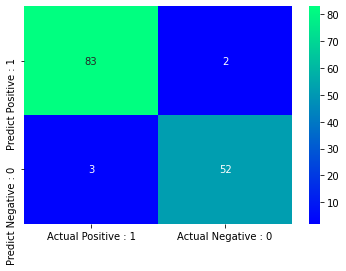

In [111]:
sns.heatmap(cm_metrix_dataframe, annot = True, fmt = 'd', cmap = 'winter')

In [60]:
print('TP = ', cm[0,0])
print('FP = ', cm[0,1])
print('FN = ', cm[1,0])
print('TN = ', cm[1,1])

TP =  83
FP =  2
FN =  3
TN =  52


In [71]:
y_predict_dataframe = Y_predict

In [74]:
ypd = pd.DataFrame(y_predict_dataframe, columns = ['Predict'])

In [75]:
ypd

,Predict
0,2
1,2
2,4
3,2
4,4
...,...
135,2
136,2
137,4
138,2


In [76]:
ypd.value_counts()

Predict
2          86
4          54
dtype: int64

In [105]:
y_predict_proba_0 = knn_algorithm.predict_proba(X_test)[:,0]

In [78]:
Y_test.value_counts()

2    85
4    55
Name: Class, dtype: int64

In [80]:
Y_test.shape

(140,)

In [106]:
u,c= np.unique(y_predict_proba_0, return_counts = True)
print(np.asarray((u,c)).T)

[[ 0.         41.        ]
 [ 0.33333333 13.        ]
 [ 0.66666667  4.        ]
 [ 1.         82.        ]]


In [108]:
y_predict_proba_1 = knn_algorithm.predict_proba(X_test)[:,1]

In [109]:
u,c = np.unique(y_predict_proba_1, return_counts = True)
print(np.asarray((u,c)).T)

[[ 0.         82.        ]
 [ 0.33333333  4.        ]
 [ 0.66666667 13.        ]
 [ 1.         41.        ]]
